In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tarfile
import librosa
import librosa.display

tar = tarfile.open(name = "mini-genres.tar.bz", mode = 'r', fileobj = None, bufsize = 10240)
tar.extractall()

audios = []
for audio in tar.getnames():
    if os.path.splitext(audio)[1] == ".au":
        audios.append(audio)

df = pd.DataFrame(np.array(audios).reshape(50, 1), columns = ['arquivo'])

In [2]:
# esta função pode ser utilizada com um for, para todos os arquivos do dataframe, cada iteração retorna um
# dicionário, no caso das figuras, foram escritas funções para exibir as variáveis retornadas, os arrays
# ficam armazenados em variáveis 

# esta função retorna apenas variáveis, para exibir os plots, existem outras funções que trabalham em cima
# das variáveis obtidas através desta
def audio_feature_extraction(sample, hop_length, n_fft): 

    audio, sr = librosa.load(sample, sr = 44100, duration = 10)
           
    stft = librosa.stft(audio, n_fft = n_fft, hop_length = hop_length)
    spectro = np.abs(stft)
    
    frequencia_db = librosa.amplitude_to_db(spectro)
    mfccs = librosa.feature.mfcc(audio, sr, n_mfcc = 13)
    chromograma = librosa.feature.chroma_stft(audio, sr = sr, n_fft = n_fft, hop_length = hop_length)
    spectral_centroid = librosa.feature.spectral_centroid(audio, sr, n_fft = n_fft, hop_length = hop_length)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(audio, sr = sr, n_fft = n_fft,
                                                        hop_length = hop_length)[0]
    spectral_bandwidth = librosa.feature.spectral_bandwidth(audio, sr = sr, n_fft = n_fft,
                                                            hop_length = hop_length)[0]
    zero_crossings = librosa.zero_crossings(audio[0:100])
    
    return {'sr':sr, 'log_scale' : frequencia_db, 'mel_scale' : mfccs, 'chromo' : chromograma,
            'centroid' : spectral_centroid, 'rolloff' : spectral_rolloff, 'bandwidth' : spectral_bandwidth,
            'zero' : zero_crossings}

# funções pra display das variáveis referentes aos plots
def display_chromo(chromograma, hop_length):
    librosa.display.specshow(chromograma, x_axis = 'tempo', y_axis = 'chroma',  hop_length = hop_length)
    plt.colorbar()
    plt.show()
    
def display_mfccs(mfccs, sr):
    librosa.display.specshow(mfccs, sr = sr, x_axis = 'tempo')
    plt.colorbar()
    plt.show()
    
def display_log_scale(frequencia_db, sr, hop_length):
    librosa.display.specshow(frequencia_db, sr = sr, hop_length = hop_length)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Frequência (Hz)')
    plt.colorbar()
    plt.title('Espectrograma')
    plt.set_cmap('inferno')
    plt.show()    
    
def show_all(d, hop_length):
    display_chromo(d['chromo'], hop_length = hop_length)
    display_mfccs(d['mel_scale'], d['sr'])
    display_log_scale(d['log_scale'], d['sr'], hop_length = hop_length)
    
    return d['centroid'], d['rolloff'], d['bandwidth'], d['zero']

In [3]:
# criando dicionário contendo extrações de múltiplos áudios 

# passando o dataframe inteiro por este 'for', 'example_dict' seria preenchido com um dicionário para cada
# áudio, cada um destes dicionários possuiria como 'key', o nome do mesmo, em string, as 'keys' destes 
# dicionários que constituiriam 'example_dict', seriam strings explicando cada um de seus valores, estes que
# são as features que desejamos extrair ou variáveis que, se passadas por funções de 'display', exibem os 
# plots exigidos

dataframe = df.iloc[0:10] # em slice do dataframe
example_dict = {i : audio_feature_extraction(i, 512, 2084) for i in dataframe['arquivo']}

In [4]:
example_dict.keys()

dict_keys(['mini-genres/metal/metal.00006.au', 'mini-genres/metal/metal.00009.au', 'mini-genres/metal/metal.00008.au', 'mini-genres/metal/metal.00003.au', 'mini-genres/metal/metal.00001.au', 'mini-genres/metal/metal.00000.au', 'mini-genres/metal/metal.00002.au', 'mini-genres/metal/metal.00004.au', 'mini-genres/metal/metal.00007.au', 'mini-genres/metal/metal.00005.au'])

In [5]:
example_dict['mini-genres/metal/metal.00006.au'].keys()

# as features de cada áudio se encontram neste formato, a célula abaixo atribui os arrays a variáveis e 
# exibe os plots, à partir dos valores do dicionário correspondente à key 'mini-genres/metal/metal.00006.au',
# selecionada como exemplo

dict_keys(['sr', 'log_scale', 'mel_scale', 'chromo', 'centroid', 'rolloff', 'bandwidth', 'zero'])

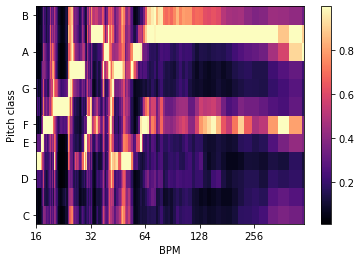

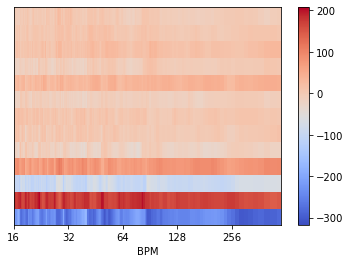

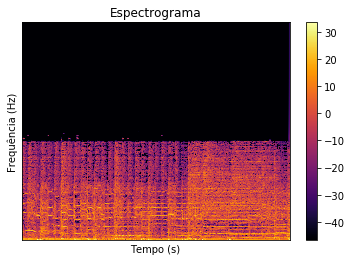

In [6]:
name = 'mini-genres/metal/metal.00006.au'
spec_centroid_arr, spec_rolloff_arr, spec_band_arr, zero_cross = show_all(example_dict[name], 512)

In [7]:
spec_centroid_arr

array([3286.42269921, 3306.95283333, 3273.91782944, 3332.1164832 ,
       3342.00631127, 3319.0212934 , 3336.34263291, 3189.01153769,
       3180.2018921 , 3115.89521089, 3167.15125461, 3235.935861  ,
       3083.63878572, 2914.91395429, 2822.61708226, 2728.41729575,
       2768.0674791 , 2578.50615117, 2474.06492322, 2619.68654501,
       2750.40306904, 2995.33370963, 3110.6697108 , 3188.63830727,
       3309.97559142, 3417.86677769, 3464.38973182, 3401.50952118,
       3383.69647613, 3360.9390476 , 3318.88988846, 3280.26878769,
       3255.18245403, 3204.27917957, 3261.87754099, 3095.13214182,
       3101.72090152, 3057.43443171, 3107.90677333, 2992.85217464,
       2973.11869019, 3197.45704249, 3314.79886382, 3275.4670982 ,
       3374.64625863, 3307.67110075, 2991.47690913, 3013.55170657,
       3037.31761821, 3063.07594795, 2988.99422786, 2499.87927637,
       2073.59968981, 2234.40114249, 2239.81508436, 2165.35598724,
       2193.54567111, 2078.78924729, 2033.37195386, 2232.89971

In [8]:
spec_rolloff_arr

array([6348.36852207, 6581.14203455, 6644.62571977, 6835.07677543,
       6919.72168906, 7152.49520154, 7279.46257198, 6940.88291747,
       7110.17274472, 7067.85028791, 6983.20537428, 6940.88291747,
       6602.30326296, 6115.5950096 , 5671.20921305, 5459.59692898,
       5205.6621881 , 4824.76007678, 4761.27639155, 4761.27639155,
       4972.88867562, 5501.9193858 , 5882.82149712, 6327.20729367,
       6538.81957774, 6750.4318618 , 6919.72168906, 7089.01151631,
       7237.14011516, 6792.75431862, 6771.59309021, 6644.62571977,
       6538.81957774, 6052.11132438, 6009.78886756, 5692.37044146,
       5734.69289827, 5628.88675624, 5459.59692898, 5311.46833013,
       5438.43570058, 5861.66026871, 6263.72360845, 6538.81957774,
       6750.4318618 , 6792.75431862, 6284.88483685, 6475.33589251,
       6454.17466411, 6052.11132438, 5523.0806142 , 4994.04990403,
       4676.63147793, 4697.79270633, 4655.47024952, 4465.01919386,
       4507.34165067, 4168.76199616, 4168.76199616, 4401.53550

In [9]:
spec_band_arr

array([2910.02070099, 2838.87211384, 2784.17770594, 2825.67098219,
       2849.98894996, 2920.9916678 , 2951.92375819, 2931.58787299,
       2976.11530322, 2975.74379012, 2946.06137474, 2901.37005724,
       2806.52869127, 2699.26884173, 2605.65365609, 2574.50125147,
       2492.71618908, 2397.83562264, 2280.53254297, 2144.40605773,
       2158.00429899, 2394.66685732, 2532.64222982, 2664.79209159,
       2685.55815852, 2744.93161066, 2822.2447146 , 2845.09930696,
       2883.46746822, 2801.37884315, 2754.2672531 , 2744.2339471 ,
       2705.27159061, 2574.72562298, 2495.4535482 , 2427.41119531,
       2431.96950498, 2433.91424844, 2357.20720769, 2311.88261096,
       2352.65634561, 2423.48480684, 2573.67967398, 2632.64726431,
       2680.70772054, 2721.61149543, 2700.10713011, 2754.97858178,
       2749.64060026, 2665.85137186, 2473.36651256, 2468.40259993,
       2456.75394487, 2450.14235583, 2394.96669996, 2333.25312686,
       2369.61026013, 2296.55507986, 2219.42587316, 2101.17964

In [10]:
sum(zero_cross)

8